# Aufgabe 17


Sie haben einen Datensatz wie er in Tabelle 4 gegeben ist. Hierbei ist
• Temperatur: Temperatur in Grad Celsius.
• Wettervorhersage: Wetterqualität (0: schlecht , 1: normal, 2: gut).
• Luftfeuchtigkeit: Luftfeuchtigkeit in Prozent.
• Wind: Aussage, ob es gerade windig ist.
• Fußball: Lohnt es sich Fußball spielen zu gehen?
Hierbei ist das Zielattribut, welches man bestimmen will, die Entscheidung, ob es sich lohnt Fußball
spielen zu gehen. In dieser Aufgabe sollen Sie zu diesem Zweck den ersten Schnitt eines binären
Entscheidungsbaumes nachvollziehen.


(a) Berechnen Sie per Hand die Entropie der Wurzel (des Baumes).

In [2]:
  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from uncertainties import ufloat
from scipy.stats import stats




In [3]:
Temperatur, Wetter, Luftfeuchtigkeit, Wind, Fußball = np.genfromtxt('Data.txt', unpack=True)


In [4]:
def get_Entropie(p_1, p_2):
    if p_1==0:
        S = -p_2*np.log2(p_2)
    elif p_2==0:
        S = -p_1*np.log2(p_1)
    else:
        S = -(p_1*np.log2(p_1) + p_2*np.log2(p_2))
    return S


# Entropie berechnen:
p_Fußball_False = len(Fußball[Fußball==False])/len(Fußball)
p_Fußball_True = 1- p_Fußball_False
S = get_Entropie(p_Fußball_False, p_Fußball_True)
print(S)

0.9402859586706311


Die Entropie wird mit folgender Formel berechnet:
\begin{align*}
S &= - \sum_i p_i \log_2(p_i) \\ 
   &= - \left[ P(\text{Fußball=True})\log_2(P(\text{Fußball=True})) +
        P(\text{Fußball=False})\log_2(P(\text{Fußball=False}))\right] \\
    &= 0,9402 \\
\end{align*} 
Mit
\begin{align*}
  P(\text{Fußball=True}) &= \frac{9}{14}\\
  P(\text{Fußball=False}) &= \frac{5}{14}\\
\end{align*}

b) Berechnen Sie per Hand den Informationsgewinn, falls ein Schnitt auf dem Attribut Wind durchgeführt wird.


In [5]:
P_Wind_false = len(Wind[Wind==False])/len(Wind)
P_Wind_true =1-P_Wind_false
print(len(np.logical_and(Wind==True, Fußball==True)))
P_Windtrue_fußballtrue = len(Wind[np.logical_and(Wind==True, Fußball==True)])/len(Wind[Wind==True])
P_Windtrue_fußballfalse = len(Wind[np.logical_and(Wind==True, Fußball==False)])/len(Wind[Wind==True])
P_Windfalse_fußballfalse = len(Wind[np.logical_and(Wind==False, Fußball==False)])/len(Wind[Wind==False])
P_Windfalse_fußballtrue = len(Wind[np.logical_and(Wind==False, Fußball==True)])/len(Wind[Wind==False])
print(P_Windtrue_fußballtrue, P_Windtrue_fußballfalse, P_Windfalse_fußballfalse, P_Windfalse_fußballtrue )


IG=S-(len(Wind[Wind==True])/14) * (get_Entropie(P_Windtrue_fußballfalse, P_Windtrue_fußballtrue)) - (len(Wind[Wind==False])/14)*(get_Entropie(P_Windfalse_fußballfalse, P_Windfalse_fußballtrue))
print(IG) 

14
0.5 0.5 0.25 0.75
0.04812703040826949


Der Informationsgewinn vom Attribut Wind wird mit folgender Formel berechnet:
\begin{align*}
  IG(Y|X) &= H(Y)-H(Y|X) \\
  IG(Wind|Fußball) &= S - \frac{D_{\text{Wind=True}}}{D} \cdot
                          H(D_{\text{Wind=True}}) -
                          \frac{D_{\text{Wind=False}}}{D} \cdot
                          H(D_{\text{Wind=False}})\\
                  &= 0,04860\\
\end{align*}
Hierbei ist $S$ die in a) berechnete Entropie, $D_{\text{Wind=True}}$ die
Anzahl der Wind-Einträge mit "True", $D_{\text{Wind=False}}$ die Anzahl der
Wind-Einträge mit "False" und $D=14$ die Gesamtanzahl der Einträge. H(X) bezeichnen die Entropien und werden wie in a) ausgerechnet. Die benötigten bedingten Wahrscheinlichkeiten zur Berechnung der Entropie lauten:
\begin{align*}
  P(\text{Fußball=True|Wind=True}) = \frac{1}{2} \\
  P(\text{Fußball=False|Wind=True}) = \frac{1}{2} \\
  P(\text{Fußball=True|Wind=False}) = \frac{3}{4} \\
  P(\text{Fußball=False|Wind=False}) = \frac{1}{4} \\
\end{align*}


c) Berechnen Sie für die verbleibenden Attribute den Informationsgewinn in Abhängigkeit von
verschiedenen Schnitten und plotten Sie den Informationsgewinn in Abhängigkeit der jeweiligen
Schnitte

WETTER:
Bester Schnitt:  1.0303030303030303
Bester IG:  0.10224356360985076
TEMPERATUR:
Bester Schnitt:  28.303030303030305
Bester IG:  0.1134008641811034
LUFTFEUCHTIGKEIT:
Bester Schnitt:  80.20202020202021
Bester IG:  0.10224356360985076


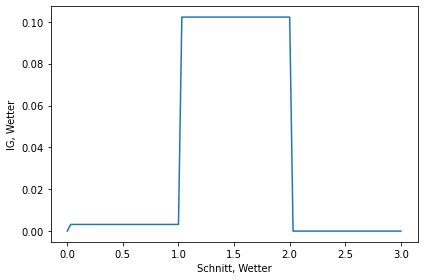

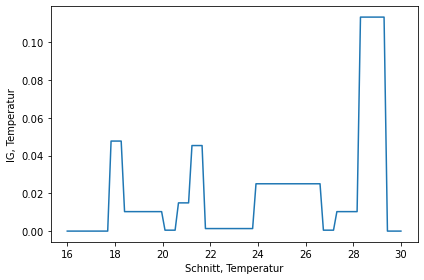

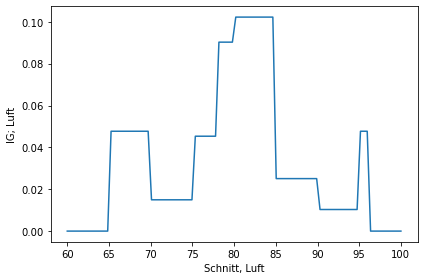

In [6]:
def get_IG(D, Schnitt):
    IG = np.zeros(len(Schnitt))


    for l in range(len(Schnitt)):
        D_u =  len(D[D < Schnitt[l]]) # Anzahl der Werte unter dem Schnitt
        D_ü = len(D)-D_u # Anzahl der Werte über dem Schnitt


        if D_u==0 or D_u==len(D):
            IG[l]=0 # Falls alle Werte unter oder über dem Schnitt sind, ist
                    # der Informationsgewinn 0
        else:
            # Berechnung der bedingten Wahrscheinlichkeiten p_unterSchnitt:
            Anzahl_unterSchnitt_False = 0


            for i in range(len(D)):
                if D[i]<Schnitt[l] and Fußball[i]==False:
                    Anzahl_unterSchnitt_False = Anzahl_unterSchnitt_False+1


            p_unterSchnitt_False = Anzahl_unterSchnitt_False/D_u
            p_unterSchnitt_True = 1-p_unterSchnitt_False
            S_1 = get_Entropie(p_unterSchnitt_False, p_unterSchnitt_True)

            # Berechnung der Wahrscheinlichkeit p_überSchnitt:
            Anzahl_überSchnitt_False = 0


            for i in range(len(D)):
                if D[i]>=Schnitt[l] and Fußball[i]==False:
                    Anzahl_überSchnitt_False = Anzahl_überSchnitt_False+1


            p_überSchnitt_False=Anzahl_überSchnitt_False/D_ü
            p_überSchnitt_True = 1-p_überSchnitt_False
            S_2 = get_Entropie(p_überSchnitt_False, p_überSchnitt_True)

            IG[l] = S - D_u/len(D)*S_1 - D_ü/len(D)*S_2

    return IG
# IG Wetter
#Schnitt_Wetter = np.array([0,1,2,3])
Schnitt_Wetter = np.linspace(0, 3, 100)
IG_Wetter = get_IG(Wetter, Schnitt_Wetter)
print('WETTER:')
print('Bester Schnitt: ', Schnitt_Wetter[np.argmax(IG_Wetter)])
print('Bester IG: ', np.max(IG_Wetter))

# IG Temperatur:
Schnitt_Temperatur = np.linspace(16, 30, 100)
IG_Temperatur = get_IG(Temperatur, Schnitt_Temperatur)
print('TEMPERATUR:')
print('Bester Schnitt: ', Schnitt_Temperatur[np.argmax(IG_Temperatur)])
print('Bester IG: ', np.max(IG_Temperatur))

# IG Luftfeuchtigkeit
Schnitt_Luft = np.linspace(60, 100, 100)
IG_Luft = get_IG(Luftfeuchtigkeit, Schnitt_Luft)
print('LUFTFEUCHTIGKEIT:')
print('Bester Schnitt: ', Schnitt_Luft[np.argmax(IG_Luft)])
print('Bester IG: ', np.max(IG_Luft))

# Plot: Wetter
plt.plot(Schnitt_Wetter, IG_Wetter)
plt.xlabel('Schnitt, Wetter')
plt.ylabel('IG, Wetter')
plt.tight_layout()
plt.savefig('IG_Wetter.pdf')
plt.show()
plt.clf()

# Plot: Temperatur
plt.plot(Schnitt_Temperatur, IG_Temperatur)
plt.xlabel('Schnitt, Temperatur')
plt.ylabel('IG, Temperatur')
plt.tight_layout()
plt.savefig('IG_Temperatur.pdf')
plt.show()
plt.clf()

# Plot: Luftfeuchtigkeit
plt.plot(Schnitt_Luft, IG_Luft)
plt.xlabel('Schnitt, Luft')
plt.ylabel('IG; Luft')
plt.tight_layout()
plt.savefig('IG_Luft.pdf')
plt.show()
plt.clf()

(d) Welches Attribut eignet sich am besten zum Trennen der Daten?


Am besten eignet sich das Attribut Temperatur zum Trennen der Daten, da hier beim besten Schnitt (28,3 Grad) der Informationsgewinn am größten ist. Bei den anderen
Attributen ist des maximale Informationsgewinn geringer.